           x         y
0   0.631903  0.807973
1   0.643258  0.289695
2   0.729436  0.139071
3   0.468540  0.565799
4   0.143098  0.303589
..       ...       ...
95  0.247276  0.254220
96  0.137015  0.414689
97  0.936450  0.491423
98  0.322004  0.191685
99  0.268131  0.024845

[100 rows x 2 columns]


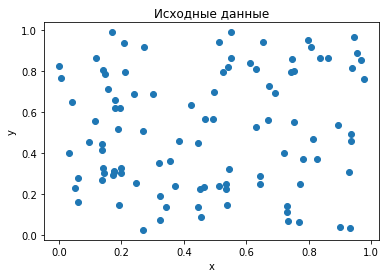

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''def choose_file():
    filename = input("Введите имя CSV файла: ")
    while not os.path.isfile(filename):
        filename = input("Файл не найден. Повторите ввод: ")
    return filename

# Загрузка данных
filename = choose_file()
'''
df = pd.read_csv("Rand.csv")

print(df)

x_data = df["x"]
y_data = df["y"]
# Отрисовка точек
plt.scatter(x_data, y_data)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Исходные данные")
plt.show()

In [2]:

X = df.iloc[:, :-1].values 
Y = df.iloc[:, 1].values

def gradient_descent(X, y, learning_rate, num_iterations):
  """
  Реализация алгоритма градиентного спуска для МНК.

  Args:
    X: Массив значений независимой переменной.
    y: Массив значений зависимой переменной.
    learning_rate: Скорость обучения.
    num_iterations: Количество итераций.

  Returns:
    theta: Массив, содержащий параметры регрессионной прямой (a, b).
    errors: Массив, содержащий значения функции ошибок на каждом шаге итерации.
  """

  # Инициализация параметров
  theta = np.zeros(2)
  # Массив для хранения значений функции ошибок
  errors = []

  for i in range(num_iterations):
    # Вычисление градиента
    gradient = compute_gradient(X, y, theta)

    # Обновление параметров
    theta -= learning_rate * gradient

    # Вычисление ошибки
    error = compute_error(X, y, theta)
    errors.append(error)

  return theta, errors


def compute_gradient(X, y, theta):
  """
  Вычисление градиента функции ошибок.

  Args:
    X: Массив значений независимой переменной.
    y: Массив значений зависимой переменной.
    theta: Массив, содержащий параметры регрессионной прямой (a, b).

  Returns:
    gradient: Массив, содержащий градиент функции ошибок.
  """

  a, b = theta
  predictions = a * X + b
  residuals = y - predictions
  gradient = np.array([
      -2 * np.mean(residuals),
      -2 * np.mean(residuals * X)
  ])

  return gradient


def compute_error(X, y, theta):
  """
  Вычисление значения функции ошибок.

  Args:
    X: Массив значений независимой переменной.
    y: Массив значений зависимой переменной.
    theta: Массив, содержащий параметры регрессионной прямой (a, b).

  Returns:
    error: Значение функции ошибок.
  """

  a, b = theta
  predictions = a * X + b
  residuals = y - predictions
  error = np.mean(residuals**2)

  return error


# Пример использования

#Скорость обучения
learning_rate = float(input("Введите скорость обучения: "))

# Запрос числа итераций у пользователя
num_iterations = int(input("Введите число итераций: "))


#learning_rate = 0.01
#num_iterations = 1000

theta, errors = gradient_descent(X, Y, learning_rate, num_iterations)

print(f"Параметры регрессионной прямой: {theta}")
print(f"Значения функции ошибок: {errors}")

Введите скорость обучения: 0.001
Введите число итераций: 150
Параметры регрессионной прямой: [0.13282897 0.06070853]
Значения функции ошибок: [0.3355206080636143, 0.33455870326077664, 0.33360075173008136, 0.33264673734508016, 0.3316966440451481, 0.3307504558352148, 0.3298081567854964, 0.3288697310312303, 0.3279351627724081, 0.3270044362735127, 0.3260775358632545, 0.32515444593430937, 0.32423515094305716, 0.3233196354093226, 0.32240788391611563, 0.3214998811093734, 0.320595611697704, 0.3196950604521305, 0.3187982122058358, 0.31790505185390944, 0.3170155643530947, 0.3161297347215367, 0.3152475480385325, 0.31436898944428077, 0.3134940441396336, 0.3126226973858489, 0.3117549345043437, 0.3108907408764489, 0.3100301019431644, 0.3091730032049158, 0.3083194302213118, 0.3074693686109025, 0.3066228040509392, 0.30577972227713435, 0.30494010908342306, 0.3041039503217258, 0.30327123190171157, 0.30244193979056166, 0.30161606001273583, 0.3007935786497379, 0.299974481839883, 0.2991587557780661, 0.2983

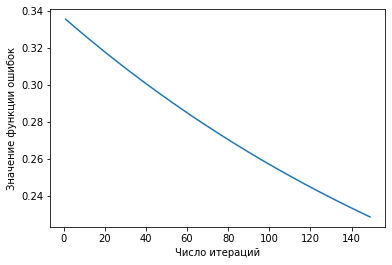

In [3]:
# Диапазон итераций
num_iterations_range = np.arange(1, num_iterations)

# Массив для хранения значений ошибок
errors_iterations = []

for num_iterations in num_iterations_range:
  theta, errors = gradient_descent(X, Y, learning_rate, num_iterations)
  errors_iterations.append(errors[-1])

# Построение графика
plt.plot(num_iterations_range, errors_iterations)
plt.xlabel("Число итераций")
plt.ylabel("Значение функции ошибок")
plt.show()

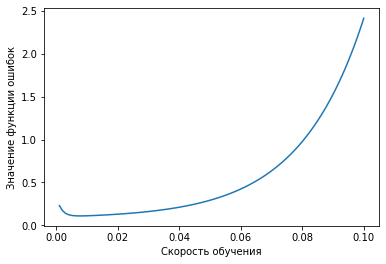

In [4]:
# Диапазон скоростей обучения
learning_rates_range = np.linspace(learning_rate, 0.1, 100)

# Массив для хранения значений ошибок
errors_learning_rates = []

for learning_rate in learning_rates_range:
  theta, errors = gradient_descent(X, Y, learning_rate, num_iterations)
  errors_learning_rates.append(errors[-1])

# Построение графика
plt.plot(learning_rates_range, errors_learning_rates)
plt.xlabel("Скорость обучения")
plt.ylabel("Значение функции ошибок")
plt.show()

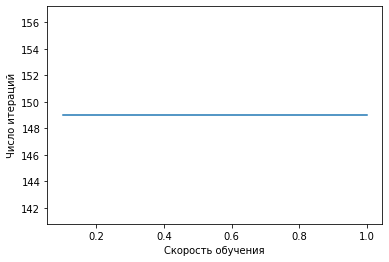

In [5]:
# Массив для хранения значений числа итераций
num_iterations_learning_rate = []
learning_rate_range = np.linspace(learning_rate, 1, 100)

for learning_rate in learning_rate_range:
  theta, errors = gradient_descent(X, Y, learning_rate, num_iterations)
  num_iterations_learning_rate.append(len(errors))

# Построение графика
plt.plot(learning_rate_range, num_iterations_learning_rate)
plt.xlabel("Скорость обучения")
plt.ylabel("Число итераций")
plt.show()